In [1]:
import numpy as np
import pandas as pd
import datetime
from pmdarima.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # 各評価指標

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [14, 10] #グラフサイズ
plt.rcParams['font.size'] = 20 #フォントサイズ

In [2]:
#線形回帰
df1=pd.read_csv('regression_pred.csv',                         
               index_col='index',           
               parse_dates=True)
df1 = df1.rename(columns={"0": "pred"})
df1.index.name = 'date'
df1.head() 

,pred
date,
2020-01-01,0.043166
2020-01-02,0.032250
2020-01-03,-0.048985
2020-01-04,-0.386361
2020-01-05,-0.307944


In [3]:
#Random Forest
df2=pd.read_csv('rf_pred.csv',                        
               index_col='index',         
               parse_dates=True)
df2 = df2.rename(columns={"0": "pred"})
df2.index.name = 'date'
df2.head() 

,pred
date,
2020-01-01,0.070826
2020-01-02,0.100679
2020-01-03,-0.044353
2020-01-04,-0.688501
2020-01-05,-0.180031


In [4]:
#XGBoost
df3=pd.read_csv('xgb_pred.csv',                        
               index_col='index',           
               parse_dates=True)
df3 = df3.rename(columns={"0": "pred"})
df3.index.name = 'date'
df3.head() 

,pred
date,
2020-01-01,0.103844
2020-01-02,0.175942
2020-01-03,0.035616
2020-01-04,-0.337661
2020-01-05,-0.098834


In [5]:
df=pd.read_csv('dataset.csv',                        
               index_col='cdr_date',          
               parse_dates=True) 

train, test = train_test_split(df, test_size=91)

y_train = train['acc_get_cnt']    #目的変数y
X_train = train.drop('acc_get_cnt', axis=1) #説明変数X

y_test = test['acc_get_cnt']              #目的変数y
X_test = test.drop('acc_get_cnt', axis=1) #説明変数X

In [6]:
print('決定係数（R2） = ', r2_score(y_test, df1.pred).round(decimals=3))
print('平均絶対誤差（MAE） = ', mean_absolute_error(y_test, df1.pred).round(decimals=3))
print('平均二乗誤差（MSE） = ', mean_squared_error(y_test, df1.pred).round(decimals=3))
print('平均二乗平方根誤差（RMSE） = ', np.sqrt(mean_squared_error(y_test, df1.pred)).round(decimals=3))


決定係数（R2） =  0.615
平均絶対誤差（MAE） =  0.235
平均二乗誤差（MSE） =  0.09
平均二乗平方根誤差（RMSE） =  0.301


In [7]:
print('決定係数（R2） = ', r2_score(y_test, df2.pred).round(decimals=3))
print('平均絶対誤差（MAE） = ', mean_absolute_error(y_test, df2.pred).round(decimals=3))
print('平均二乗誤差（MSE） = ', mean_squared_error(y_test, df2.pred).round(decimals=3))
print('平均二乗平方根誤差（RMSE） = ', np.sqrt(mean_squared_error(y_test, df2.pred)).round(decimals=3))


決定係数（R2） =  0.59
平均絶対誤差（MAE） =  0.243
平均二乗誤差（MSE） =  0.096
平均二乗平方根誤差（RMSE） =  0.31


In [8]:
print('決定係数（R2） = ', r2_score(y_test, df3.pred).round(decimals=3))
print('平均絶対誤差（MAE） = ', mean_absolute_error(y_test, df3.pred).round(decimals=3))
print('平均二乗誤差（MSE） = ', mean_squared_error(y_test, df3.pred).round(decimals=3))
print('平均二乗平方根誤差（RMSE） = ', np.sqrt(mean_squared_error(y_test, df3.pred)).round(decimals=3))


決定係数（R2） =  0.629
平均絶対誤差（MAE） =  0.229
平均二乗誤差（MSE） =  0.087
平均二乗平方根誤差（RMSE） =  0.295


In [9]:
#今回は単純な平均でアンサンブル
df = (df1 + df2 + df3)/3

In [10]:
df.head()

,pred
date,
2020-01-01,0.072612
2020-01-02,0.102957
2020-01-03,-0.019241
2020-01-04,-0.470841
2020-01-05,-0.195603


In [11]:
print('R2   ＝ ', r2_score(y_test, df.pred).round(decimals=3))
print('MAE  ＝ ', mean_absolute_error(y_test, df.pred).round(decimals=3))
print('MSE  ＝ ', mean_squared_error(y_test, df.pred).round(decimals=3))
print('RMSE ＝ ', np.sqrt(mean_squared_error(y_test, df.pred)).round(decimals=3))


R2   ＝  0.632
MAE  ＝  0.228
MSE  ＝  0.086
RMSE ＝  0.294


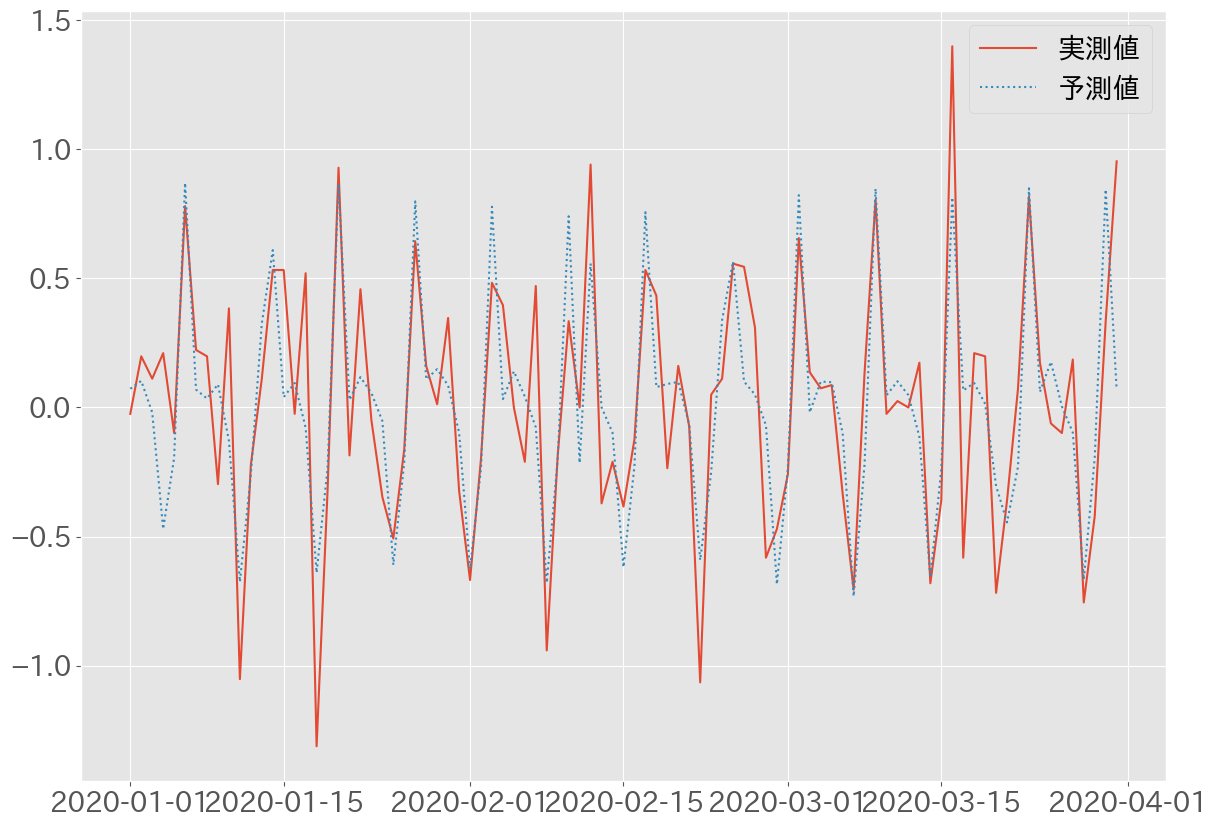

In [12]:
fig, ax = plt.subplots()

# 実測値
ax.plot(
    y_test.index, 
    y_test.values, 
    linestyle='-',
    label='実測値')

# 予測値
ax.plot(
    y_test.index, 
    df.pred, 
    linestyle=':',
    label="予測値") 

# 凡例表示
ax.legend()

plt.show()
